In [91]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

print(tf.__version__)

2.4.0


In [92]:
from zipfile import ZipFile
file_name = "Images.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [93]:
# To delete this 

#!rm -rf Images.zip

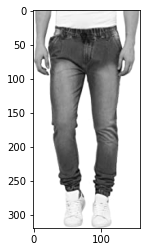

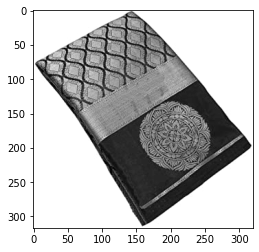

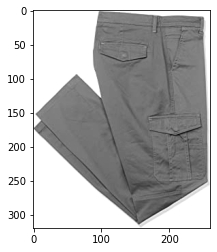

In [94]:
DATADIR = "Scrapped Images"
CATEGORIES = ['Jeans Men','Sarees Women','Trousers Men']

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want 

In [95]:
print(img_array.shape)

(320, 260)


In [96]:
print(img_array)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


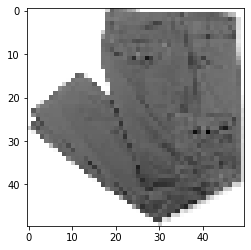

In [97]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

Now, we want to begin building our training data!

In [98]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # Sarees, Trousers and Jeans

        path = os.path.join(DATADIR,category)  # create path to sarees, trousers and jeans
        class_num = CATEGORIES.index(category)  # get the classification

        for img in os.listdir(path):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

In [99]:
print(len(training_data))

720


In [100]:
import random

random.shuffle(training_data)

In [101]:
for sample in training_data[:10]:
    print(sample[1])


2
0
2
2
1
0
2
2
2
2


We've got the classes nicely mixed in! Time to make our model!

In [102]:
X = []
y = []

In [103]:
for features,label in training_data:
    X.append(features)
    y.append(label)

X=np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

Let's save this data, so that we don't need to keep calculating it every time we want to play with the neural network model:

In [104]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

We can always load it in to our current script, or a totally new one by doing:

In [105]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

In [106]:
X[1]

array([[[255],
        [126],
        [174],
        ...,
        [252],
        [255],
        [255]],

       [[255],
        [222],
        [154],
        ...,
        [185],
        [255],
        [255]],

       [[255],
        [255],
        [122],
        ...,
        [170],
        [255],
        [255]],

       ...,

       [[255],
        [255],
        [255],
        ...,
        [ 33],
        [ 58],
        [136]],

       [[255],
        [255],
        [255],
        ...,
        [ 56],
        [ 62],
        [ 51]],

       [[255],
        [255],
        [255],
        ...,
        [212],
        [213],
        [215]]], dtype=uint8)

In [107]:
pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [108]:
y[1]

0

Now that we've got out dataset, we're ready to cover convolutional neural networks and implement one with our data for classification.

In [109]:
#Importing Libraries 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

In [110]:
#Normalization

X = X/255.0
X[1]

array([[[1.        ],
        [0.49411765],
        [0.68235294],
        ...,
        [0.98823529],
        [1.        ],
        [1.        ]],

       [[1.        ],
        [0.87058824],
        [0.60392157],
        ...,
        [0.7254902 ],
        [1.        ],
        [1.        ]],

       [[1.        ],
        [1.        ],
        [0.47843137],
        ...,
        [0.66666667],
        [1.        ],
        [1.        ]],

       ...,

       [[1.        ],
        [1.        ],
        [1.        ],
        ...,
        [0.12941176],
        [0.22745098],
        [0.53333333]],

       [[1.        ],
        [1.        ],
        [1.        ],
        ...,
        [0.21960784],
        [0.24313725],
        [0.2       ]],

       [[1.        ],
        [1.        ],
        [1.        ],
        ...,
        [0.83137255],
        [0.83529412],
        [0.84313725]]])

In [111]:
X.shape

(720, 50, 50, 1)

In [112]:
print((X.shape, X.dtype))

((720, 50, 50, 1), dtype('float64'))


In [113]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation("sigmoid"))

Compile the model

In [122]:
model.compile(optimizer='adam',
              loss="binary_crossentropy",
              metrics=['accuracy'])

Fit the model

In [116]:
y = np.array(y)

In [118]:
y.dtype

dtype('int64')

In [125]:
model.fit(X, y, batch_size=32, epochs=30, validation_split=0.1)

Epoch 1/30
21/21 [==============================] - 3s 138ms/step - loss: -3206.5046 - accuracy: 0.3318 - val_loss: -7456.8916 - val_accuracy: 0.3750
Epoch 2/30
21/21 [==============================] - 3s 135ms/step - loss: -5283.1885 - accuracy: 0.3735 - val_loss: -9741.9385 - val_accuracy: 0.4028
Epoch 3/30
21/21 [==============================] - 3s 135ms/step - loss: -8382.3457 - accuracy: 0.3364 - val_loss: -16130.2969 - val_accuracy: 0.3889
Epoch 4/30
21/21 [==============================] - 3s 136ms/step - loss: -13069.7607 - accuracy: 0.3333 - val_loss: -29576.5234 - val_accuracy: 0.3750
Epoch 5/30
21/21 [==============================] - 3s 136ms/step - loss: -17850.7656 - accuracy: 0.3534 - val_loss: -33390.8359 - val_accuracy: 0.3889
Epoch 6/30
21/21 [==============================] - 3s 137ms/step - loss: -27731.8184 - accuracy: 0.3457 - val_loss: -47869.7031 - val_accuracy: 0.3889
Epoch 7/30
21/21 [==============================] - 3s 135ms/step - loss: -38824.8633 - accur

#Evaluate accuracy
Next, compare how the model performs on the test dataset:

In [124]:
# In verbose 0 will be silent, 1 will show you animation and 2 will be just epoc 1/10.

model.evaluate(X, y, verbose = 2)

23/23 - 1s - loss: -2.9584e+03 - accuracy: 0.3333


[-2958.449951171875, 0.3333333432674408]